Выброс - это элемент / объект данных, который значительно отличается от остальных (так называемых обычных) объектов.
Они могут быть вызваны ошибками измерения или выполнения. 
Анализ для обнаружения выбросов называется анализом выбросов. 
Существует много способов обнаружения выбросов, и процесс удаления - это фрейм данных, т
акой же, как удаление элемента данных из фрейма данных panda.

In [ ]:
# В нормально распределенных данных можно получить все значения, которые находятся в пределах 2 стандартных отклонений от среднего. 
# Затем, заполним пропущенные значения, генерируя случайные числа между (mean — 2 * std) & (mean + 2 * std)

rand = np.random.randint(average_age - 2*std_age, average_age + 2*std_age, size = count_nan_age)
dataframe["age"][np.isnan(dataframe["age"])] = rand

 Hot-deck: Копирование значений из других похожих записей. Это полезно, только если у вас достаточно доступных данных. 
И это может быть применено к числовым и категориальным данным.

Можно использовать случайный подход, где мы заполняем отсутствующее значение случайным значением. 
Сделав этот подход еще на шаг вперед, можно сначала разделить набор данных на две группы (страты) на основе некоторой характеристики,
например, пола,а затем заполнить пропущенные значения для разных полов по отдельности, случайным образом.

Выпадающие значения — Outliers
Это значения, которые значительно отличаются от всех других наблюдений. Любое значение данных, 
которое находится на расстоянии более (1,5 * IQR) от квартилей Q1 и Q3, считается выбросом.

Выбросы невиновны, пока их вина не доказана. С учетом сказанного, их не следует удалять, 
если для этого нет веских причин.

Например, можно заметить некоторые странные, подозрительные значения, которые вряд ли произойдут, 
и поэтому решает удалить их. Тем не менее, они заслуживают расследования, прежде чем удалить.

Стоит также отметить, что некоторые модели, такие как линейная регрессия, очень чувствительны к выбросам. 
Другими словами, выбросы могут отбросить модель, из которой собрана большая часть данных.

In [ ]:
# взято из https://stackoverflow.com/questions/27424178/faster-way-to-remove-outliers-by-group-in-large-pandas-dataframe?noredirect=1&lq=1
def WinsorizeStats(data):
    out = mstats.winsorize(data, limits=[0.05, 0.05])
    return out

In [ ]:
WinsorizeStats(data)

In [ ]:
#find Q1, Q3, and interquartile range for each column
Q1 = data.quantile(q=.25)
Q3 = data.quantile(q=.75)
IQR = data.apply(stats.iqr)

#only keep rows in dataframe that have values within 1.5\*IQR of Q1 and Q3
data_clean = data[~(data < (Q1-1.5\*IQR)) | (data > (Q3+1.5\*IQR))).any(axis=1)]

#find how many rows are left in the dataframe 
data_clean.shape

In [ ]:
in case you want specific columns:

cols = ['col_1', 'col_2'] # one or more

Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
#------------------------------------------------------------------------------
# accept a dataframe, remove outliers, return cleaned data in a new dataframe
# see http://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm
#------------------------------------------------------------------------------
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

Затем мы можем определить и удалить выбросы, используя метод z-оценки или метод межквартильного диапазона:

Метод Z-оценки:

#find absolute value of z-score for each observation
z = np.abs(stats.zscore(data))

#only keep rows in dataframe with all z-scores less than absolute value of 3 
data_clean = data[(z<3).all(axis=1)]

#find how many rows are left in the dataframe 
data_clean.shape

In [ ]:
## Defining the function to calculate the Z - Score
def Z_score(data):
    global outliers,zscore
    outliers = []
    zscore = []
    upper_threshold = 3
    lower_threshold = -3
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z_score= (i - mean)/std 
        zscore.append(z_score)
        if np.abs(z_score) > upper_threshold or np.abs(z_score) < lower_threshold:
            outliers.append(i)
    return print("Total number of outliers are",len(outliers))

## Function calling
Z_score(df['Salary'])

Для каждого столбца вашего каркаса данных вы можете получить квантиль с:

q = df["col"].quantile(0.99)
а затем отфильтровать с:

df[df["col"] < q]
Если необходимо удалить нижний и верхний выбросы, объедините условие с оператором AND:
q_low = df["col"].quantile(0.01)
q_hi  = df["col"].quantile(0.99)

df_filtered = df[(df["col"] < q_hi) & (df["col"] > q_low)]

Обнаружение выбросов
Выбросы могут быть обнаружены с помощью визуализации, реализации математических формул в наборе данных или с использованием статистического подхода. Все это обсуждается ниже.

1. Визуализация
 Пример 1: Использование прямоугольника

Он эффективно и эффективно фиксирует сводку данных с помощью простого блока и усов. Boxplot обобщает данные выборки с использованием 25-го, 50-го и 75-го процентилей. Можно просто получить представление (квартили, медиану и выбросы) в наборе данных, просто взглянув на его диаграмму.

# Box Plot
import seaborn as sns
sns.boxplot(df_boston['DIS'])
Вывод:


Boxplot- столбец DIS

На приведенном выше графике ясно видно, что значения выше 10 действуют как выбросы.

# Position of the Outlier
print(np.where(df_boston['DIS']>10))
Вывод:



In [ ]:
Пример 2. Использование диаграммы рассеяния.

Он используется, когда у вас есть сопряженные числовые данные, или когда ваша зависимая переменная имеет несколько значений для каждой независимой переменной чтения, или при попытке определить взаимосвязь между двумя переменными. В процессе использования точечной диаграммы ее также можно использовать для обнаружения выбросов.

Для построения точечной диаграммы требуются две переменные, которые каким-то образом связаны друг с другом. Итак, здесь используются "Доля акров, не связанных с розничной торговлей, на город" и "Ставка налога на недвижимость в размере полной стоимости за 10 000 долларов США", названия столбцов которых - “ПРОМЫШЛЕННОСТЬ” и “НАЛОГ” соответственно.

# Scatter plot
fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(df_boston['INDUS'], df_boston['TAX'])
 
# x-axis label
ax.set_xlabel('(Proportion non-retail business acres)/(town)')
 
# y-axis label
ax.set_ylabel('(Full-value property-tax rate)/( $10,000)')
plt.show()
Вывод:


Точечный график

Глядя на график, можно сделать вывод, что большинство точек данных находятся в нижнем левом углу графика, но есть несколько точек, которые находятся точно; y напротив, это верхний правый угол графика. Эти точки в правом верхнем углу можно рассматривать как выбросы.

Используя аппроксимацию, можно сказать, что все те точки данных, которые имеют значения x> 20 и y> 600, являются выбросами. Следующий код может получить точное положение всех тех точек, которые удовлетворяют этим условиям.

# Position of the Outlier
print(np.where((df_boston['INDUS']>20) & (df_boston['TAX']>600)))
Вывод:



In [ ]:
# 2. Z-оценка
Z-оценка также называется стандартной оценкой. Это значение / оценка помогает понять, насколько далека точка данных от среднего значения. И после настройки порогового значения можно использовать значения z баллов точек данных для определения выбросов.

Zscore = (data_point -среднее значение) / std. отклонение

# Z score
from scipy import stats
import numpy as np
 
z = np.abs(stats.zscore(df_boston['DIS']))
print(z)
Вывод:


часть списка (z)

Приведенный выше вывод представляет собой всего лишь снимок части данных; фактическая длина списка (z) равна 506, то есть количеству строк. Он выводит значения z-score для каждого элемента данных столбца

Теперь для определения порогового значения выбросов выбирается значение, которое обычно равно 3,0. Поскольку 99,7% точек данных лежат между стандартным отклонением +/-3 (с использованием метода распределения по Гауссу).

threshold = 3
 
# Position of the outlier
print(np.where(z > 3))
Вывод:


Индекс выбросов

In [ ]:
3. IQR (межквартильный диапазон)
IQR (межквартильный диапазон)Подход к поиску выбросов в интервале между квартилями является наиболее часто используемым и наиболее надежным подходом, используемым в области исследований.

IQR = Quartile3 – Quartile1

# IQR
Q1 = np.percentile(df_boston['DIS'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df_boston['DIS'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
Вывод:



Для определения базового значения выбросов определяется выше и ниже нормального диапазона наборов данных, а именно верхней и нижней границ, определите верхнюю и нижнюю границы (учитывается значение 1,5 * IQR) :

верхний = Q3 + 1,5 * IQR

нижний = Q1 – 1,5 * IQR

В приведенной выше формуле, согласно статистике, используется увеличение IQR на 0,5 (new_IQR = IQR + 0,5 * IQR), чтобы учесть все данные между 2,7 стандартными отклонениями в распределении Гаусса.

# Above Upper bound
upper = df_boston['DIS'] >= (Q3+1.5*IQR)
 
print("Upper bound:",upper)
print(np.where(upper))
 
# Below Lower bound
lower = df_boston['DIS'] <= (Q1-1.5*IQR)
print("Lower bound:", lower)
print(np.where(lower))
Вывод:


Определенные границы и индекс выброса, соответствующие границам 

In [ ]:
# Тепловая карта пропущенных значений
Когда признаков в наборе не очень много, визуализируйте пропущенные значения с помощью тепловой карты
cols = df.columns[:30] # первые 30 колонок
# определяем цвета 
# желтый - пропущенные данные, синий - не пропущенные
colours = ['#000099', '#ffff00'] 
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [ ]:
. Гистограмма пропущенных данных
Еще одна хорошая техника визуализации для наборов с большим количеством признаков – построение гистограммы для числа отсутствующих значений в записи.
# сначала создаем индикатор для признаков с пропущенными данными
for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing


# затем на основе индикатора строим гистограмму
ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1)

df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='i

In [ ]:
# в библиотеке Seaborn sns.histplot мы указываем источник данных, что будет на оси x и количество интервалов
# Создадим цикл для прорисовки гистограм для всех столбцов
# параметр kde = True добавляет кривую плотности распределения
# параметр bin_s - задаем - наглядное значение- 20!!! интервалы (bins) и считаем, сколько наблюдений попало в каждый из них.

def plt_hist(df, name_type_hist, bin_s):
# Функция печати гистограмм по столбцам dataframe для анализа
# передаем в функцию df имя dataframe, name_type_hist (либо sns.histplot, либо sns.displot или sns.boxplot) 
# наименование типа функции для построения типа гистограммы,
# занчение bin_s = для указания количества выбор для гистаграммы

    if name_type_hist == sns.histplot:
        print('     Исследование гистограмм данных в столбцах от количества измерений  ')
        print('-' * 80)
        cols = df.columns
        for column in cols:  
            print('Гистограмма: ', column )
            name_type_hist(data =df, x = column, bins = bin_s, kde = True, fill = True)
            plt.show()# выводим отдельно каждый график
        
    elif name_type_hist == sns.displot:
        print('     Исследование гистограмм данных в столбцах от плотности непрерывного случайного распределения   ')
        print('-' * 80)
        cols = df.columns
        for column in cols:  
            print('Гистограмма: ', column )
            name_type_hist(data =df, x = column, kind = 'kde', fill = True) #bins = bin_s # hue="cut"
            plt.show()
    else:
        name_type_hist == sns.boxplot
        print('     Исследование  данных в столбцах по типу box-and-wisker plot (ящик с усами)   ')
        print('-' * 80)
        cols = df.columns
        for column in cols:  
            print('Гистограмма: ', column )
            name_type_hist(data =df, x = column) 
           # whis=2 мы увеличили диапазон усов, включив в него значения, которые в 2 раза превышают межквартильный диапазон
            #  https://datagy.io/seaborn-boxplot/
            
            plt.show()
    
    return

In [ ]:
Базовая концепция Matplotlib
График состоит из следующих частей. Давайте разберемся с этими частями.



Figure: это целая фигура, которая может содержать одну или несколько осей(графиков). Мы можем думать о figure как о холсте, на котором хранятся сюжеты.

Axes: фигура может содержать несколько осей. Онf состоит из двух или трех(в случае 3D) объектов Axis. Каждая ось состоит из заголовка, x-метки и y-метки.

Axis: оси – это количество объектов, похожих на линии, которые отвечают за создание пределов графика.

Artist: это все, что мы видим на графике, например, текстовые объекты, объекты Line2D и объекты коллекций. Привязаны к Axes.
Источник: https://pythonpip.ru/examples/kak-postroit-grafik-funktsii-na-python-pri-pomoschi-matplotlib

In [ ]:
# Взято из https://miptstats.github.io/courses/python/09_seaborn.html
Установка эстетических параметров графиков:

sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)

context — параметры контекста, влияет на размер меток, линий и других элементов, но не на общий стиль. 
Контекст: notebook, paper, talk, poster;
style — стиль осей: darkgrid (серый фон с сеткой), whitegrid (белый фон с сеткой), dark (серый фон без сетки), white (белый фон без сетки), ticks;
palette — цветовая палитра: deep, muted, bright, pastel, dark, colorblind, а так же палитры из matplotlib;
font — шрифт текста;
font_scale — масштабирование размера текста.

Важно!
sns.set. Дело в том, что эта функция меняет глобальные переменные: все последующие графики отрисовываются в том же стиле. Иногда это уместно: можно один раз вызвать sns.set в самом начале ноутбука и получить стилизованные графики с минимумом усилий. Во всех остальных ситуациях нужно использовать контекстные менеджеры sns.plotting_context и sns.axes_style вместо sns.set. 
Как ниже:
with sns.plotting_context("notebook"), sns.axes_style("ticks"): функция установки других параметров вместо sns.set
    функция для отрисовки
    sns.despine() отрисовка осей
_____________________
plt.subplot(a2, b2, ci+1) # a- количество строк квадратоы для графиков, в - количкство столбцов квадратов графиков, с- количество изображаемых графиков в квадрате 

plt.title(name) - name - название заголовка фрейма с графиками в цикле с именами из Списка

sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)
fig — фигура matplotlib. Если None, то текущая;
top, right, left, bottom — указатели границ. Левую и нижнюю оставляют, т.к. вдоль них расположены метки на координатных осях.
___________________________________
Функция sns.kdeplot
Построение и отрисовка KDE (в 1D или 2D):

sns.kdeplot(data, data2=None, shade=False, vertical=False, kernel='gau', bw='scott', gridsize=100, cut=3, clip=None, legend=True, cumulative=False, shade_lowest=True, cbar=False, cbar_ax=None, cbar_kws=None, ax=None, **kwargs)

data — выборка;
data2 — вторая координата в двумерном случае;
shade — закрашивать ли области. В 1D закрашивает область под графиком, в 2D закрашивает области между линиями уровня;
vertical — повернуть график;
kernel — метка ядра. В 1D доступны gau, cos, biw, epa, tri, triw; в 2D только гауссовское;
bw — ширина ядра. Можно указать scott, silverman или число. В 2D можно указать пару чисел.
gridsize — размер сетки для отрисовки графика. Влияет только на точность отрисовки, а не на точность оценки плотности;
cut — задает границы отрисовки kde: график будет нарисован на величину cut * bw от крайних точек выборки;
clip — нижняя и верхняя граница точек, по которым строится kde. Параметр имеет вид (low, high) в 1D и ((low_x, high_x), (low_y, high_y)) в 2D;
legend — отрисовка легенды;
cumulative — если True, то рисует функцию распределения, соответствующую построенной KDE;
shade_lowest — нужно ли закрашивать последний контур для 2D. Флаг False может быть полезен при отрисовке нескольких kde на одном графике;
cbar — в 2D добавляет colorbar (шкала цветов);
cbar_kws — аргументы, соответствующие fig.colorbar;
kwargs — другие аргументы, соответствующие plt.plot или plt.contour. Например, color — цвет, cmap — цветовая схема, n_levels — количество линий уровня.

3.2 Функция sns.histplot
У Seaborn есть одна специализированная функция для создания гистограмм: seaborn.histplot() функция (для построения одномерных или двумерных гистограмм). Отличие sns.histplot от hist заключается в том, что в histplot по умолчанию количествово бинов подбирается лучше чем в hist от matplotlib.
_______________________________
seaborn.histplot(data, x, y, hue, stat, bins, binwidth, discrete, KDE, log_scale)

data — это входные данные, предоставляемые в основном в виде фрейма данных или массива NumPy;
x, y — числовые переменные которые вы хотите построить. Другими словами, это переменные, на основе которых Seaborn создаст гистограмму;
hue — параметр позволяющий сопоставить категориальную переменную с цветом полос;
stat — (необязательно) указывает частоту, количество, плотность или вероятность;
bin — параметр позволяет управлять ячейками гистограммы (т.е. Количеством баров).;
binwidth — ширина каждой ячейки переопределяет ячейки, но может использоваться с binrange;
discrete — если значение True, по умолчанию установливается значение binwidth=1 и рисуются полосы так, чтобы они были центрированы по соответствующим точкам данных. Это позволяет избежать “пробелов”, которые в противном случае могут появиться при использовании дискретных (целочисленных) данных;
KDE — это один из механизмов, используемых для сглаживания графика гистограммы;
color — определяет цвет графика.
3.3 Функция sns.distplot
Гибко настраиваемый график оценки одномерного распределения по выборке. Совмещает возможности функций plt.hist, sns.kdeplot, sns.rugplot и функций fit из scipy.stats.
_____________________________________
sns.distplot(a, bins=None, hist=True, kde=True, rug=False, fit=None, hist_kws=None, kde_kws=None, rug_kws=None, fit_kws=None, color=None, vertical=False, norm_hist=False, axlabel=None, label=None, ax=None)

a — выборка;
bins — число бинов гистограммы. Если None, то выставляется по правилу Freedman-Diaconis;
hist — рисовать ли гистограмму;
kde — рисовать ли kde;
rug — рисовать ли точки выборки в виде штрихов;
hist_kws, kde_kws, rug_kws — параметры гистограммы, kde и rugplot в виде словарей;
fit — семейство распредений. Объект должен иметь метод fit, который вернет ОМП в виде tuple, и метод pdf, который по сетке посчитает плотность распределения с параметрами, соответствующими ОПМ. Например, подойдет распределение из scipy.stats. Если параметр указан, что будет нарисована плотность, соответствующая ОМП в данном классе;
color — цвет;
vertical — повернуть график;
norm_hist — нормировать ли гистограмму.
__________________________

plt.figure(figsize=(12, 8))
with sns.axes_style("darkgrid"):
    ax = sns.kdeplot(setosa.sepal_length, setosa.sepal_width, 
                     label="setosa", cmap='Blues')
    ax = sns.kdeplot(versicolor.sepal_length, versicolor.sepal_width, 
                     label="versicolor", cmap='Greens')
    ax = sns.kdeplot(virginica.sepal_length, virginica.sepal_width, 
                     label="virginica", cmap='Reds')
    ax.set_title("Ирисы Фишера");
    ax.legend().get_frame().set_facecolor("white");
ax.legend().get_frame().set_facecolor("white"); Цвет квадрата  для легенды!!!



In [ ]:
Box plot — график, использующийся в описательной статистике, компактно изображающий одномерное распределение вероятностей.

Такой вид диаграммы в удобной форме показывает медиану (или, если нужно, среднее), нижний и верхний квартили, минимальное и максимальное значение выборки и выбросы. Несколько таких ящиков можно нарисовать бок о бок, чтобы визуально сравнивать одно распределение с другим; их можно располагать как горизонтально, так и вертикально. Расстояния между различными частями ящика позволяют определить степень разброса (дисперсии) и асимметрии данных и выявить выбросы.

seaborn.boxplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, dodge=True, fliersize=5, linewidth=None, whis=1.5, notch=False, ax=None, **kwargs)

x, y, hue — одномерные данные или имена переменных из data. Параметр hue отвечает за категории данных;
data — данные;
orient: "v" | "h" — ориентация (вертикальная или горизонтальая);
color и palette — задают цвет.






In [ ]:
6. PairGrid
Сетка графиков для визуализации попарных отношений в данных.

class sns.PairGrid(data, hue=None, hue_order=None, palette=None, hue_kws=None, vars=None, x_vars=None, y_vars=None, diag_sharey=True, size=2.5, aspect=1, despine=True, dropna=True)

data — данные;
hue — категории, которые будут закрашиваться в разные цвета;
palette — цветовая схема, может быть задана в виде словаря цветов;
height — высота каждой грани (в дюймах).
Возвращает объект, у которого доступны перечисленные ниже функции. В эти функции нужно передать функцию func, с помощью которой будет построен график по паре переменных (или по одной на диагонали), а так же параметры этой функции.

map(func, **kwargs) — для каждой клетки применить func;
map_diag(func, **kwargs) — для каждой клетки на диагонали применить func;
map_offdiag(func, **kwargs) — для каждой клетки вне диагонали применить func;
map_lower(func, **kwargs) — для каждой клетки под диагональю применить func;
map_upper(func, **kwargs) — для каждой клетки над диагональю применить func.
Визуализируем данные об ирисах Фишера.

на диагонали расположим одномерные ядерные оценки плотности;
под диагональю — двумерные;
над диагональю изобразим сами точки.

In [ ]:
g = sns.PairGrid(df, hue='species', height=4)
g.map_lower(sns.kdeplot, cmap='Blues_d')
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3);

In [ ]:
7. Heatmap
Визуализирует двумерную таблицу в виде тепловой карты.

sns.heatmap(data, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)

data — 2D-данные;
vmin и vmax — минимальное и максимальное значения цветов;
cmap — цветовая схема;
robust — если не указаны vmin и vmax, то не используются выбросы при определении минимума и максимума;
annot — в какие ячейки записывать данные;
fmt — формат записи данных;
linewidths — ширина линий между ячейками;
linecolor — цвет линий между ячейками;
cbar — рисовать ли colorbar.
Типичное применение — визуализация корреляции между признаками.

9. Jointplot
График двух переменных, соеднияющий функции 1D и 2D графиков.

sns.jointplot(x, y, data=None, kind='scatter', stat_func=<function pearsonr>, color=None, size=6, ratio=5, space=0.2, dropna=True, xlim=None, ylim=None, joint_kws=None, marginal_kws=None, annot_kws=None, **kwargs)

x, y — данные или имена переменных в data;
data — данные;
kind : { "scatter" | "reg" | "resid" | "kde" | "hex" } — тип графика (точки, регрессия, остатки регрессии, ядерная оценка плотности, гексаэдры);
stat_func — функция-критерий, который возвращает статистику и pvalue. По умолчанию критерий для проверки некоррелированности на основе коэффициента корреляции Пирсона;
color — цвет;
height — размер фигуры;
dropna — удаление пропущенных значений;
xlim, ylim — ограничения по осям.

Визуализируем двумерную оценку плотности и две одномерных
with sns.plotting_context("notebook", font_scale=1.5), sns.axes_style("white"):
    
    sns.jointplot(x, y, kind='kde', height=7, space=0);
    
    
    
Если не указать тип визуализации, то будут нарисованы точки и гистограммы
sns.jointplot(x, y, height=7, space=0);

Отметим, что sns.jointplot можно конфигурировать вручную! У объекта JointGrid, который эта функция возвращает, можно настраивать все три части графика:

ax_marg_x — верхний график;
ax_marg_y — правый график;
ax_joint — центральный график;
На них можно отрисовать что угодно, в том числе вещи, совершенно не связанные с исходными данными. Но если хочется построить другой график на тех же данных, то на выручку приходят функции plot_joint и plot_marginals
    
with sns.plotting_context("notebook"), sns.axes_style("darkgrid"):
    
    # центральный график
    graph = sns.jointplot(x, y, color="xkcd:dark sea green")
    
    # верний график
    graph.ax_marg_x.clear()
    sns.kdeplot(x, shade=True, color="xkcd:azure", ax=graph.ax_marg_x)
    
    # правый график
    graph.ax_marg_y.clear()
    sns.distplot(y, vertical=True, kde=False, 
                 color="xkcd:orange", ax=graph.ax_marg_y);

In [ ]:
plt.subplot(121)
plt.plot(t,y1,'b-.')
plt.subplot(122)
plt.plot(t,y2,'r--')
plt.show()

In [ ]:
# Взято из https://pyprog.pro/sns/sns_6_visualization_of_dist.html

In [ ]:
Сохранение графика в виде изображения
График можно сохранить и виде файла-изображения, забыв обо всем написанном коде. Для этого используется функция savefig(). В аргументы нужно передать желаемое название будущего файла. Также важно, чтобы эта команда шла в конце, после всех остальных (иначе сохранится пустой PNG-файл).

plt.axis([0,5,0,20])
plt.title('My first plot', fontsize=20, fontname='Times New Roman')
plt.xlabel('Counting', color='gray')
plt.ylabel('Square values',color='gray')
plt.text(1,1.5,'First')
plt.text(2,4.5,'Second')
plt.text(3,9.5,'Third')
plt.text(4,16.5,'Fourth')
plt.text(1.1,12,r'$y = x^2$', fontsize=20, bbox={'facecolor':'yellow','alpha':0.2})  
plt.grid(True)
plt.plot([1,2,3,4],[1,4,9,16],'ro')
plt.plot([1,2,3,4],[0.8,3.5,8,15],'g^')
plt.plot([1,2,3,4],[0.5,2.5,4,12],'b*')
plt.legend(['First series','Second series','Third series'], loc=2)
plt.savefig('my_chart.png')
Файл появится в рабочей директории. Он будет называться my_chart.png и включать изображение графика.

In [ ]:
Функция  Seaborn Pairplot
Функция Seaborn Pairplot позволяет пользователям создавать сетку осей, через которую каждая числовая переменная, хранящаяся в данных, распределяется по осям X и Y в структуре столбцов и строк. Мы можем создать точечные графики, чтобы отображать попарные отношения в дополнение к графику распределения, отображающему распределение данных в столбце по диагонали.

Функцию pairplot() также можно использовать для демонстрации подмножества переменных, или мы можем нанести различные типы переменных на строки и столбцы.

Давайте посмотрим на синтаксис функции Seaborn Pairplot, показанный ниже:

seaborn.pairplot( 
    data, 
    hue = None, 
    hue_order = None, 
    palette = None, 
    vars = None, 
    x_vars = None, 
    y_vars = None, 
    kind = 'scatter', 
    diag_kind = 'auto', 
    markers = None, 
    height = 2.5, 
    aspect = 1, 
    corner = False, 
    dropna = False, 
    plot_kws = None, 
    diag_kws = None, 
    grid_kws = None, 
    size = None 
    ) 
Параметры функции Pairplot:

data: параметр data принимает данные в зависимости от визуализации, которую нужно построить. Значения могут быть в виде DataFrame, Array или List of Arrays.
hue_order, order: параметр hue_order или просто порядок – это порядок категориальных переменных, используемых в графике. Значения этого параметра могут быть списками строк.
scale: параметр масштаба используется для масштабирования графика. Этот параметр принимает больше значений для использования, таких как площадь, количество или ширина.
scale_hue: параметр scale_hue принимает логическое значение, чтобы определить, оценивается ли шкала на каждом уровне основной группирующей переменной как ИСТИНА или для всех скрипок на графике как ЛОЖЬ.
gridsize: параметр gridsize принимает целочисленное значение для вычисления плотности ядра для графика.
inner: внутренний параметр позволяет пользователям определять внутренние точки скрипичного сюжета. Этот параметр принимает такие значения, как box, point, quartile, stick или None.
orient: параметр orient позволяет пользователю определять ориентацию графика. Ориентация может быть вертикальной, обозначается буквой «v», или горизонтальной, обозначается буквой «h» соответственно.
linewidth: параметр linewidth принимает целое число с плавающей запятой в качестве значения для определения ширины серых линий, используемых на графике.
цвет: параметр цвета позволяет пользователю указать диапазон цвета для всех элементов данных графика. Значение этого параметра может быть цвет matplotlib.
palette: параметр палитры используется для определения цветов, используемых для каждого уровня графика с различными оттенками.
ax: параметр ax используется для определения осей, на которых будет построен график. Значением этого параметра может быть matplotlib Axes.
Источник: https://pythonpip.ru/osnovy/parnyy-grafik-seaborn-v-python-dlya-vizualizatsii-dannyh




Полный список всех значений палитры, из которых вы можете выбрать:
[‘Accent’, ‘Accent_r’, ‘Blues’, ‘Blues_r’, ‘BrBG’, ‘BrBG_r’, ‘BuGn’, ‘BuGn_r’, ‘BuPu’, ‘BuPu_r’, 
 ‘CMRmap’, ‘CMRmap_r’, ‘Dark2’, ‘Dark2_r’, ‘GnBu’, ‘GnBu_r’, ‘Greens’, ‘Greens_r’, ‘Greys’, ‘Greys_r’, ‘OrRd’, 
 ‘OrRd_r’, ‘Oranges’, ‘Oranges_r’, ‘PRGn’, ‘PRGn_r’, ‘Paired’, ‘Paired_r’, ‘Pastel1’, 
 ‘Pastel1_r’, ‘Pastel2’, ‘Pastel2_r’, ‘PiYG’, ‘PiYG_r’, ‘PuBu’, ‘PuBuGn’, ‘PuBuGn_r’, 
 ‘PuBu_r’, ‘PuOr’, ‘PuOr_r’, ‘PuRd’, ‘PuRd_r’, ‘Purples’, ‘Purples_r’, ‘RdBu’, ‘RdBu_r’, 
 ‘RdGy’, ‘RdGy_r’, ‘RdPu’, ‘RdPu_r’, ‘RdYlBu’, ‘RdYlBu_r’, ‘RdYlGn’, ‘RdYlGn_r’, ‘Reds’, 
 ‘Reds_r’, ‘Set1’, ‘Set1_r’, ‘Set2’, ‘Set2_r’, ‘Set3’, ‘Set3_r’, ‘Spectral’, ‘Spectral_r’, 
 ‘Wistia’, ‘Wistia_r’, ‘YlGn’, ‘YlGnBu’, ‘YlGnBu_r’, ‘YlGn_r’, ‘YlOrBr’, ‘YlOrBr_r’, ‘YlOrRd’, 
 ‘YlOrRd_r’, ‘afmhot’, ‘afmhot_r’, ‘autumn’, ‘autumn_r’, ‘binary’, ‘binary_r’, ‘bone’, 
 ‘bone_r’, ‘brg’, ‘brg_r’, ‘bwr’, ‘bwr_r’, ‘cividis’, ‘cividis_r’, ‘cool’, ‘cool_r’, ‘coolwarm’, ‘coolwarm_r’, ‘copper’, ‘copper_r’,
 ‘cubehelix’, ‘cubehelix_r’, ‘flag’, ‘flag_r’, ‘gist_earth’, ‘gist_earth_r’, ‘gist_gray’, ‘gist_gray_r’, ‘gist_heat’, ‘gist_heat_r’, ‘gist_ncar’, ‘gist_ncar_r’,
 ‘gist_rainbow’, ‘gist_rainbow_r’, ‘gist_stern’, ‘gist_stern_r’, ‘gist_yarg’, 
 ‘gist_yarg_r’, ‘gnuplot’, ‘gnuplot2’, ‘gnuplot2_r’, ‘gnuplot_r’, ‘gray’, ‘gray_r’,
 ‘hot’, ‘hot_r’, ‘hsv’, ‘hsv_r’, ‘icefire’, ‘icefire_r’, ‘inferno’, 
 ‘inferno_r’, ‘magma’, ‘magma_r’, ‘mako’, ‘mako_r’, 
 ‘nipy_spectral’, ‘nipy_spectral_r’, ‘ocean’, ‘ocean_r’, ‘pink’, ‘pink_r’,
 ‘plasma’, ‘plasma_r’, ‘prism’, ‘prism_r’, ‘rainbow’, ‘rainbow_r’,
 ‘rocket’, ‘rocket_r’, ‘seismic’, ‘seismic_r’, ‘spring’, ‘spring_r’,
 ‘summer’, ‘summer_r’, ‘tab10’, ‘tab10_r’, ‘tab20’, ‘tab20_r’, ‘tab20b’,
 ‘tab20b_r’, ‘tab20c’, ‘tab20c_r’, ‘terrain’, ‘terrain_r’, ‘twilight’,
 ‘twilight_r’, ‘twilight_shifted’, ‘twilight_shifted_r’, ‘viridis’, ‘viridis_r’, ‘vlag’, ‘vlag_r’, ‘winter’, ‘winter_r’]


In [ ]:
df_corr_value.index[0] - если нужно вывести название индекса

In [ ]:
# История с  логорифмом __________________________________________

Взято https://habr.com/ru/post/557998/
При анализе гистограмм  Histplot с парметром KDE ? ряд графиков показывают ассиметрию. И в первуб очередь гистограмма параметра 'surface_density' показывает наиболее четко выраженную асимметрию. 
Хвост с правой стороны намного длиннее, чем с левой, и поэтому мы говорим, что асимметрия - положительная. 
Мы можем оценить асимметрию данных количественно при помощи функции библиотеки pandas skew:

In [ ]:
data_composite_inspect['surface_density'].skew()

In [ ]:
# Эта асимметрия может быть эффективным образом смягчена 
# путем взятия логарифма веса при помощи функции библиотеки numpy np.log

In [ ]:
# А теперь уберем ассиметрию в 'surface_density'с помощью (np.log) предварительно создав новый df: df_log

In [ ]:
df_log = data_composite_inspect.copy()

In [ ]:
df_log['surface_density'] = np.log(df_log['surface_density'])

In [ ]:
# Выведем первоначальную гистаграмму 'surface_density' в df: data_composite_inspect

In [ ]:
data_composite_inspect['surface_density'].hist(bins=30)

In [ ]:
# а теперь гистограмму 'surface_density' из df: df_log
df_log['surface_density'].hist(bins=30)

In [ ]:
df_log['surface_density'].skew()

In [ ]:
# гистограмма 'surface_density' сместилась вправо и стала отризательной ,но мы ушли от значений 0!

In [ ]:
'''Визуализация корреляции '''
 
xs = data_composite_inspect['strapery_strength']
ys = data_composite_inspect['surface_density'].apply( np.log )
pd.DataFrame(np.array([xs,ys]).T).plot.scatter(0, 1, s=12, grid=True)
plt.xlabel('strapery_strength')
plt.ylabel('Логарифмическая surface_density')
plt.show()

In [ ]:
# Конец истории с логарифмом__________________________________

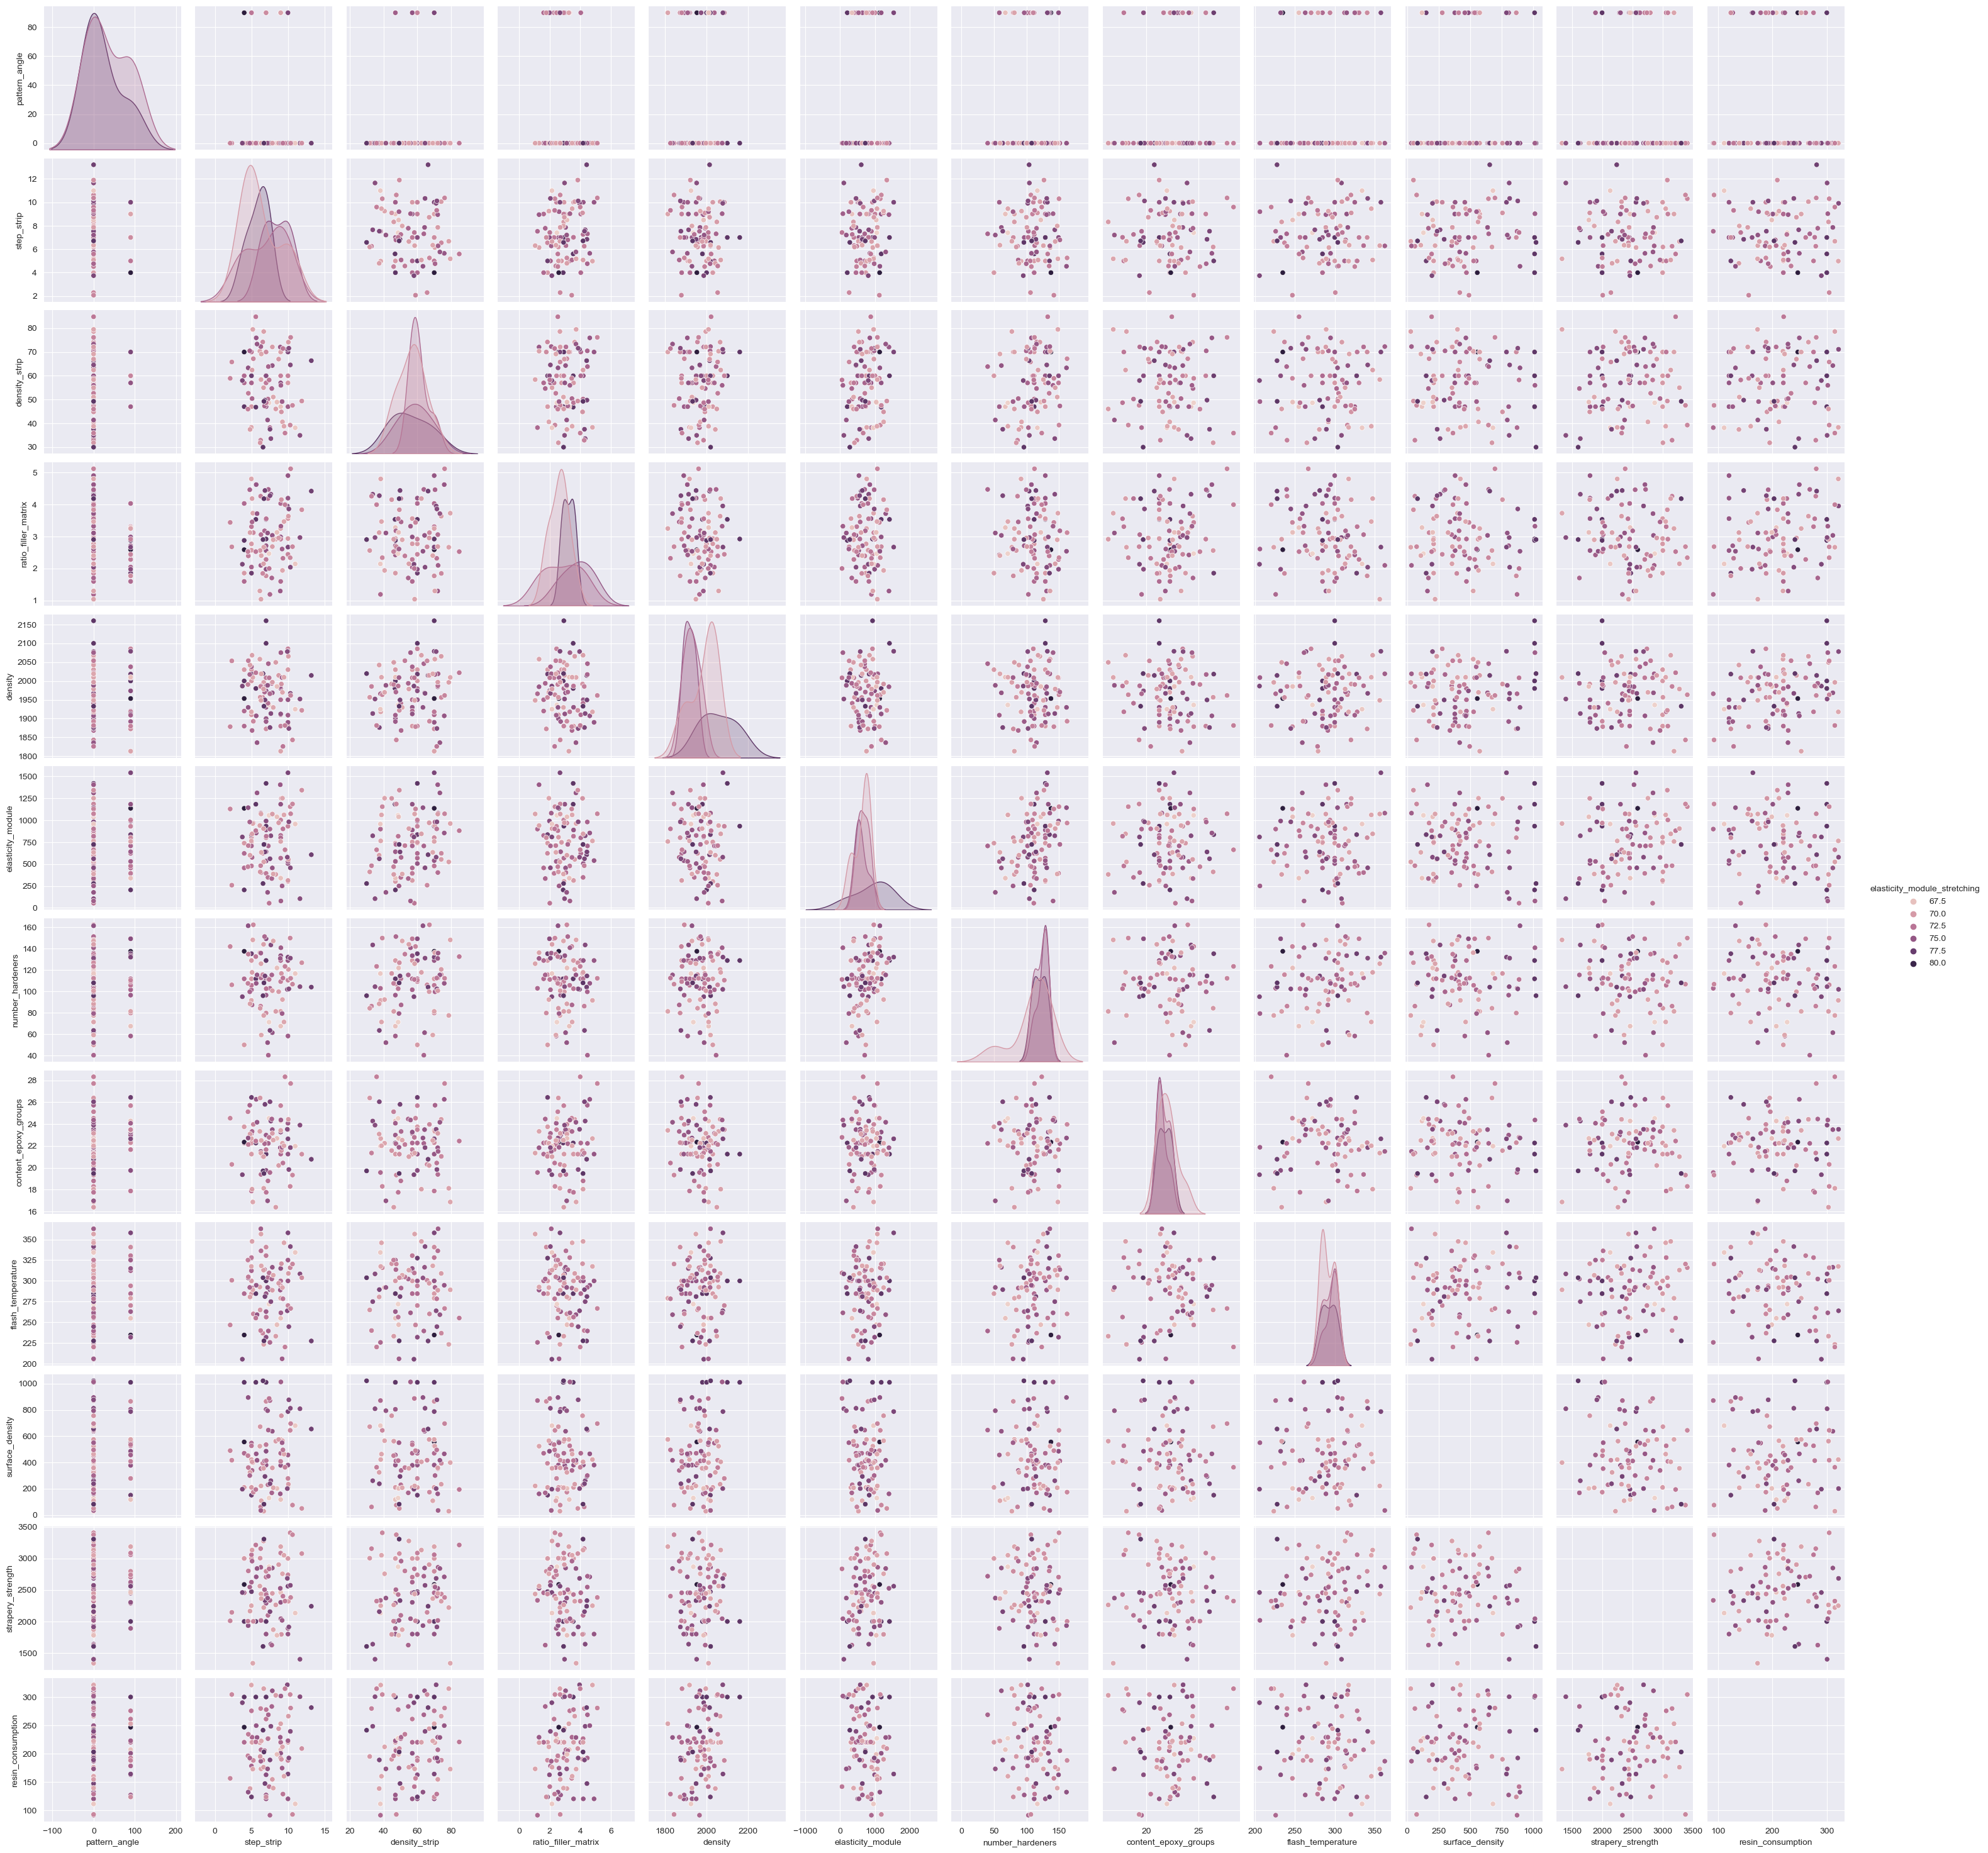

In [69]:
# Рассмотрим зависимости парметров DF друг от друга после проведенной чистки массива данных от выбросов
sns.pairplot(data_main.head(100), diag_kind='kde', hue="elasticity_module_stretching")

In [ ]:
sns.pairplot(data_main, 
             x_vars=['surface_density',
                     'ratio_filler_matrix',
                     'flash_temperature',
                     'elasticity_module'],
             y_vars='strapery_strength',
             hue =  'pattern_angle', 
             palette='coolwarm'
             )
plt.show()

In [ ]:
https://scipython.com/book/chapter-8-scipy/examples/scipyinterpolateinterp1d/


scipy.interpolate.interp1d
This example demonstrates some of the different interpolation methods available in scipy.interpolation.interp1d.

import numpy as np
from scipy.interpolate import interp1d
import pylab

A, nu, k = 10, 4, 2

def f(x, A, nu, k):
    return A * np.exp(-k*x) * np.cos(2*np.pi * nu * x)

xmax, nx = 0.5, 8
x = np.linspace(0, xmax, nx)
y = f(x, A, nu, k)

f_nearest = interp1d(x, y, kind='nearest')
f_linear  = interp1d(x, y)
f_cubic   = interp1d(x, y, kind='cubic')

x2 = np.linspace(0, xmax, 100)
pylab.plot(x, y, 'o', label='data points')
pylab.plot(x2, f(x2, A, nu, k), label='exact')
pylab.plot(x2, f_nearest(x2), label='nearest')
pylab.plot(x2, f_linear(x2), label='linear')
pylab.plot(x2, f_cubic(x2), label='cubic')
pylab.legend()
pylab.show()


In [ ]:
y_svr = np.ravel(y_train) # Функция ravel() возвращает сжатый до одной оси массив.